# Short Notes

read csv file

check for nan values

counts of unique values in the column 'R' of a DataFrame

seprate x and y value

convert categorical data of target variable y  into format

apply train and test split method

create a neural network Model without Dropout Layer

evaluate model to check train and test accuracy

make  predictions on a test dataset by generated model

create classification report to check precision recall and accuracy

create a neural network Model with Dropout Layer and repeat the process



# Question

how to use of dropout layer in neural network

Dropout Regularization In Deep Neural Network

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

Dataset information: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks) Download it from here: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

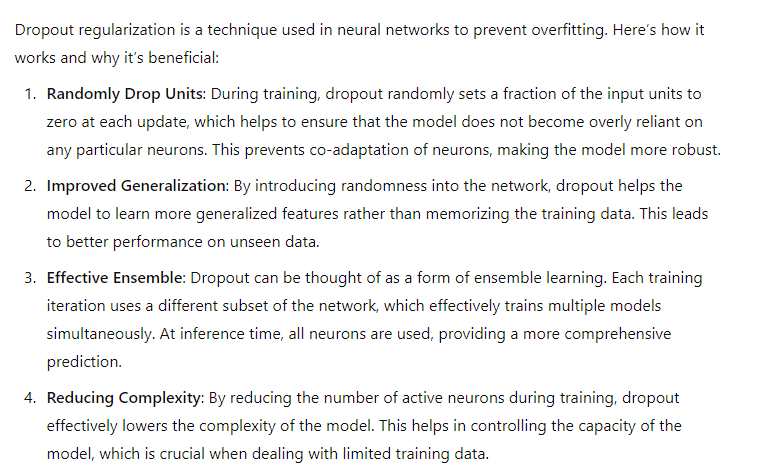

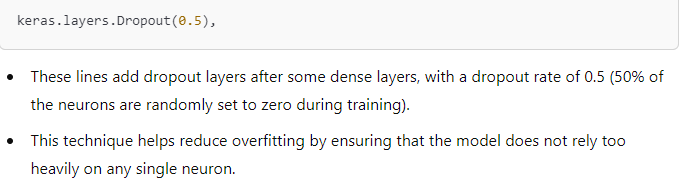

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Specify the path to your CSV file
file_path = r'R:\ML\DEEP learning\csv\sonar_dataset.csv'

# Load the CSV file into a DataFrame
df= pd.read_csv(file_path)

df.sample(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
77,0.0231,0.0351,0.0030,0.0304,0.0339,0.0860,0.1738,0.1351,0.1063,0.0347,...,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030,R
152,0.0233,0.0394,0.0416,0.0547,0.0993,0.1515,0.1674,0.1513,0.1723,0.2078,...,0.0104,0.0062,0.0026,0.0025,0.0061,0.0038,0.0101,0.0078,0.0006,M
18,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063,R
50,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,R
63,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063,R


In [5]:
df.shape

(207, 61)

In [6]:
# check for nan values
df.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [7]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [8]:
#counts of unique values in the column 'R' of a DataFrame
df['R'].value_counts()  # Notice the string instead of the integer

R
M    111
R     96
Name: count, dtype: int64

In [9]:
X = df.drop('R', axis=1)
y = df['R']
y.head()

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object

In [10]:
y = pd.get_dummies(y, drop_first=True)
y.sample(5) # R --> 1 and M --> 0

,R
122,False
117,False
142,False
21,True
143,False


In [11]:
y.value_counts()

R    
False    111
True      96
Name: count, dtype: int64

In [12]:

X.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
X_train.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
67,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0125,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012
14,0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,...,0.0154,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073
164,0.0221,0.0065,0.0164,0.0487,0.0519,0.0849,0.0812,0.1833,0.2228,0.1810,...,0.0167,0.0089,0.0051,0.0015,0.0075,0.0058,0.0016,0.0070,0.0074,0.0038
179,0.0310,0.0221,0.0433,0.0191,0.0964,0.1827,0.1106,0.1702,0.2804,0.4432,...,0.0249,0.0204,0.0059,0.0053,0.0079,0.0037,0.0015,0.0056,0.0067,0.0054
19,0.0473,0.0509,0.0819,0.1252,0.1783,0.3070,0.3008,0.2362,0.3830,0.3759,...,0.0107,0.0193,0.0118,0.0064,0.0042,0.0054,0.0049,0.0082,0.0028,0.0027


# Using Deep Learning Model


# Model without Dropout Layer

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5434 - loss: 0.6898
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5498 - loss: 0.6736
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5804 - loss: 0.6526
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6432 - loss: 0.6427
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.5997
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.5814
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6747 - loss: 0.5375
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.5205
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8281 - loss: 0.4603
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8546 - loss: 0.4245
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.4218
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [17]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8093 - loss: 1.0642 


[1.0379931926727295, 0.807692289352417]

Training Accuracy >>> Test Accuracy

In [18]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[1.9713365e-05 9.2543283e-05 1.5580849e-01 6.1631940e-06 9.9993461e-01
 4.9700093e-01 9.8663568e-01 5.8335563e-06 4.3048190e-06 9.9994963e-01]
[0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


In [19]:
y_test[:10]

,R
186,False
155,False
165,False
200,False
58,True
34,True
151,False
18,True
202,False
62,True


In [20]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.85      0.82        27
        True       0.83      0.76      0.79        25

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



# Model with Dropout Layer

In [21]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4977 - loss: 0.7497
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 0.7847
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 0.7314
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4586 - loss: 0.7330
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 0.6792
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5851 - loss: 0.6645  
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5586 - loss: 0.6732
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5449 - loss: 0.6810
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4737 - loss: 0.7076
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4731 - loss: 0.6742
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6109 - loss: 0.6852
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

In [22]:
modeld.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8325 - loss: 0.4614 


[0.4592152237892151, 0.8269230723381042]

# Training Accuracy is still good but Test Accuracy Improved

In [23]:
y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[0.0129821  0.02196557 0.01720481 0.0024217  0.99573225 0.15605043
 0.36218718 0.00273829 0.00617071 0.99035203]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.75      1.00      0.86        27
        True       1.00      0.64      0.78        25

    accuracy                           0.83        52
   macro avg       0.88      0.82      0.82        52
weighted avg       0.87      0.83      0.82        52



# You can see that by using dropout layer test accuracy increased from 0.77 to 0.81